In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<Axes: xlabel='Outcome'>

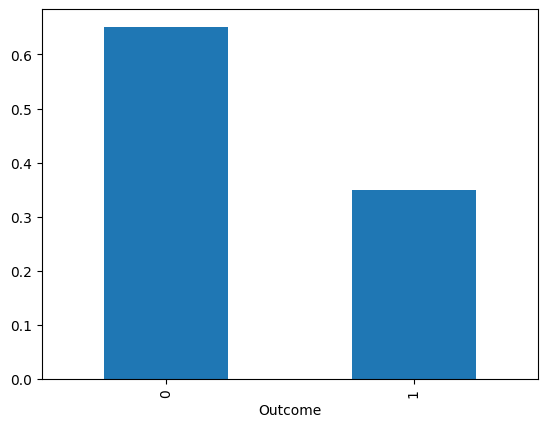

In [3]:
data.Outcome.value_counts(normalize=True).plot(kind = "bar")

In [4]:
X = data.drop("Outcome", axis=1).to_numpy()
Y = data[['Outcome']].to_numpy()

In [5]:
# Preprocessing
scaler = StandardScaler()
scaled_X  = scaler.fit_transform(X)

In [10]:
# train - test
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, Y, test_size = 0.2, random_state = 999 , stratify=Y
)

In [26]:
# Logistic 
log_reg = LogisticRegression(class_weight = "balanced")
log_reg.fit(X_train, y_train)

/home/shailesh/Desktop/VritEducation/.vritenv/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(class_weight='balanced')

In [27]:
y_pred = log_reg.predict(X_test)

In [28]:
np.sum(y_test.flatten() == y_pred) / len(y_test.flatten())

np.float64(0.7532467532467533)